In [139]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [140]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew 
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

from collections import Counter
import datetime



Dataset Load from Google Drive

In [141]:
df=pd.read_csv('/content/drive/MyDrive/data/dataset_startup - startup data.csv')

In [142]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


Numeric data type

In [143]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


Categorical Data

In [144]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired


Dealing with my predicting value which is status

In [145]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

In [146]:
for index, row in df.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [147]:
df.drop(["labels"], axis=1, inplace=True)

In [148]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


Missing value check and handaling missing value

In [149]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
state_code.1,1,0.108342


In [150]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [151]:

totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values columns "Unnamed: 6": ', totalNull)

Total Missing Values columns "Unnamed: 6":  0


In [152]:
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values columns "closed_at": ', totalNull)
df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])
        df.drop(["state_code.1"], axis=1, inplace=True)

Total Missing Values columns "closed_at":  0
515 CA nan


In [153]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


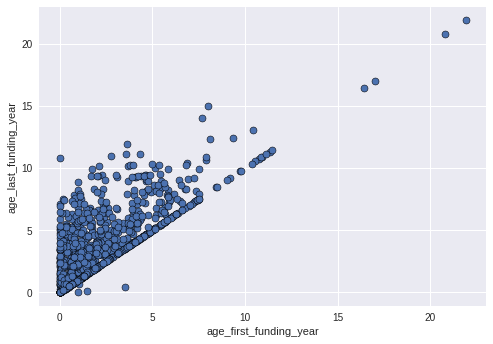

In [154]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

In [155]:
df_acquired = df[(df["status"] == True)]
df_acquired.shape
df_closed = df[(df["status"] == False)]
df_closed.shape

(326, 47)

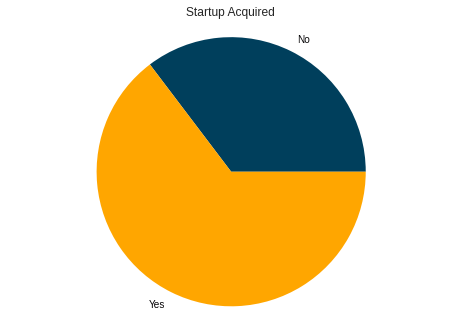

In [156]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

In [157]:
df_closed.founded_at=pd.to_datetime(df_closed.founded_at)
df_closed.closed_at=pd.to_datetime(df_closed.closed_at)
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)
df_closed['age_closed_startup'].head()
df_closed['year'] = df_closed['age_closed_startup'].dt.days /365
df_closed.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_closed_startup,year
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.00,1,0,792 days,2.169863
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,2002-01-01,2009-02-15,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.00,1,0,2602 days,7.128767
11,835,CA,37.452992,-122.185098,94025,c:4829,Menlo Park,Menlo Park CA 94025,Center'd,2006-01-01,2011-12-02,2/1/2007,5/3/2011,1.0849,5.3370,0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:4829,1,1,1,0,0,0,1.75,1,0,2161 days,5.920548


In [158]:
(df_closed['age_closed_startup'].mean()) 
ratarata = round(2184 / 365) 
print("Rata-Rata Startup Closed :", ratarata ,"tahun")

Rata-Rata Startup Closed : 6 tahun


Cheak duplicate values and dealing negetie values

In [159]:

duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [Unnamed: 0, state_code, latitude, longitude, zip_code, id, city, Unnamed: 6, name, founded_at, closed_at, first_funding_at, last_funding_at, age_first_funding_year, age_last_funding_year, age_first_milestone_year, age_last_milestone_year, relationships, funding_rounds, funding_total_usd, milestones, is_CA, is_NY, is_MA, is_TX, is_otherstate, category_code, is_software, is_web, is_mobile, is_enterprise, is_advertising, is_gamesvideo, is_ecommerce, is_biotech, is_consulting, is_othercategory, object_id, has_VC, has_angel, has_roundA, has_roundB, has_roundC, has_roundD, avg_participants, is_top500, status]
Index: []


In [160]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [161]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])



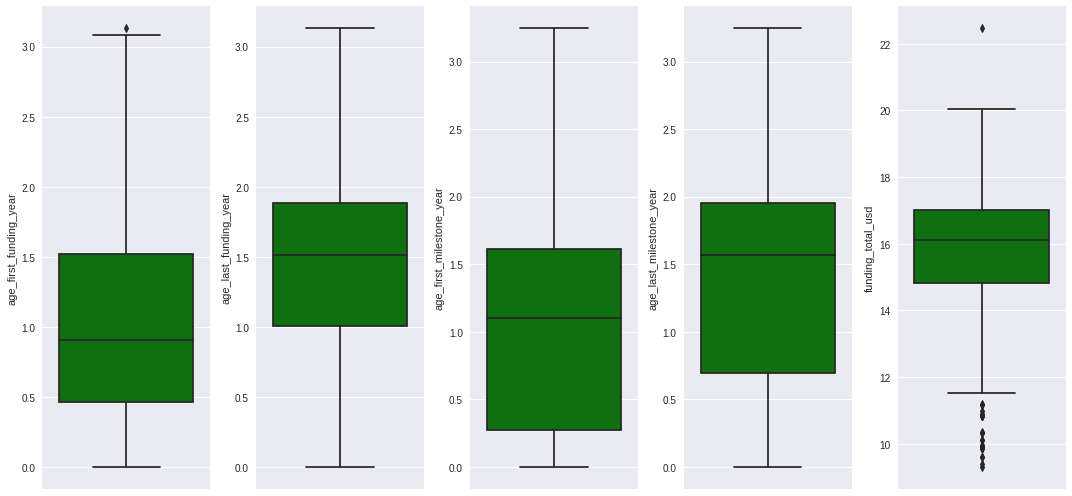

In [162]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [163]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0


In [164]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1


In [165]:
len(df[(df["has_RoundABCD"] == 1)].index)
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()
len(df[(df["has_Seed"] == 1)].index)
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1,0


In [166]:
len(df[(df["invalid_startup"] == 1)].index)

27

In [167]:
df.founded_at=pd.to_datetime(df.founded_at)
df.closed_at=pd.to_datetime(df.closed_at)
df['age_closed_startup'] = df.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)
df['age_closed_startup'].head()
df['age_startup_year'] = df['age_closed_startup'].dt.days /365

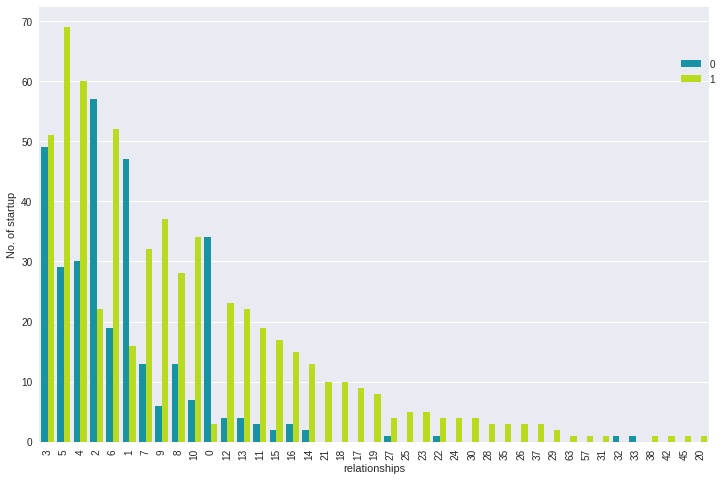

In [168]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [169]:
conditions = [
    (df['relationships'] <= 5),
    (df['relationships'] > 5) & (df['relationships'] <= 10),
    (df['relationships'] > 10) & (df['relationships'] <= 16),
    (df['relationships'] > 16)
    ]

values = ['4', '3', '2', '1']
df['tier_relationships'] = np.select(conditions, values)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_closed_startup,age_startup_year,tier_relationships
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,2007-01-01,2013-12-31,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1,0,2556 days,7.002740,4
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,2000-01-01,2013-12-31,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0,0,5113 days,14.008219,3
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2013-12-31,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0,0,1749 days,4.791781,4
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,2013-12-31,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0,0,4382 days,12.005479,4
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1,0,792 days,2.169863,4


In [170]:
df['tier_relationships'] = df.tier_relationships.astype(int)

Drop unused data

In [171]:
df = df.drop(['state_code'],axis=1)
df = df.drop(['id'],axis=1)
df = df.drop(['Unnamed: 6'],axis=1)
df = df.drop(['category_code'],axis=1)
df = df.drop(['object_id'],axis=1)
df = df.drop(['zip_code'],axis=1)
df = df.drop(['founded_at'],axis=1)
df = df.drop(['closed_at'],axis=1)
df = df.drop(['first_funding_at'],axis=1)
df = df.drop(['last_funding_at'],axis=1)
df = df.drop(['city'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['age_closed_startup'],axis=1)
df = df.drop(['relationships'],axis=1)

In [172]:
df.head()
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


In [173]:
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_startup_year,tier_relationships
0,1.178440,1.386969,1.734925,2.041753,3,12.834684,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,0,1,1,0,7.002740,4
1,1.812542,2.397650,2.080129,2.080129,4,17.506887,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1,1,0,0,14.008219,3
2,0.709463,0.709463,0.899145,1.164868,1,14.771022,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,1,0,0,0,4.791781,4
3,1.418641,1.842944,1.946296,1.946296,3,17.504390,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,1,0,0,0,12.005479,4
4,0.000000,0.981517,0.037681,0.037681,2,14.077876,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,1,1,0,2.169863,4


train_test split

In [174]:
from sklearn.model_selection import train_test_split
X = df.drop('status', axis = 1) 
y = df['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (646, 36)
Shape of the y Train : (646,)
Shape of the X test : (277, 36)
Shape of the y test : (277,)


In [175]:
y_train.head(10)

48     1
546    1
263    0
747    1
646    1
420    0
64     1
738    0
52     1
378    1
Name: status, dtype: int64

In [176]:
X_train.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_startup_year,tier_relationships
48,0.173113,0.783445,0.857050,0.977386,2,13.959612,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9.5000,1,0,1,1,0,3.608219,3
546,1.849431,2.416646,2.197836,2.197836,4,18.210176,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,5.6667,1,1,1,0,0,14.008219,4
263,1.094035,1.094035,0.000000,0.000000,1,15.955577,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.0000,0,0,1,1,0,5.550685,4
747,2.128553,2.128553,2.128232,2.555210,1,15.990262,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5.0000,1,1,0,0,0,12.005479,2
646,1.578834,1.763514,1.785808,2.111122,3,16.056220,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1.5000,1,1,1,0,0,8.589041,1


For Feature important

In [177]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
gbm = lgb.LGBMRegressor()
gbm.fit(X_train,y_train)
gbm.booster_.feature_importance()

fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)


,cols,fea_imp
34,age_startup_year,474
1,age_last_funding_year,314
5,funding_total_usd,307
0,age_first_funding_year,296
3,age_last_milestone_year,224
2,age_first_milestone_year,193
28,avg_participants,138
35,tier_relationships,56
6,milestones,55
4,funding_rounds,50


Feature ranking with recursive feature Elimanation

In [178]:
from sklearn.feature_selection import RFE
rfe = RFE(gbm)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
fea_rank_ = pd.DataFrame({'cols':X.columns, 'fea_rank':rfe.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)

[ True  True  True  True  True  True  True  True False False False  True
 False  True False False False False False False False  True  True False
  True False False False  True  True False  True False False  True  True]


,cols,fea_rank
0,age_first_funding_year,1
31,has_Investor,1
29,is_top500,1
28,avg_participants,1
24,has_roundA,1
22,has_VC,1
21,is_othercategory,1
34,age_startup_year,1
13,is_web,1
11,is_otherstate,1


Training Accuracy : 1.0
Testing Accuracy : 0.8122743682310469


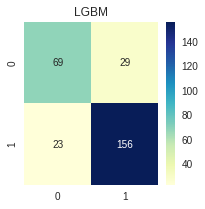

              precision    recall  f1-score   support

           0       0.75      0.70      0.73        98
           1       0.84      0.87      0.86       179

    accuracy                           0.81       277
   macro avg       0.80      0.79      0.79       277
weighted avg       0.81      0.81      0.81       277

------------------------------------------
ROC Curves              = 0.7877950062706647
Precision-Recall Curves = 0.8988920570531204


In [179]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()

clf.fit(X_train,y_train)

y_pred_lgb = clf.predict(X_test)

print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('LGBM')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
Precision_Recall_lgbm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_lgbm)

Training Accuracy : 1.0
Testing Accuracy : 0.8303249097472925


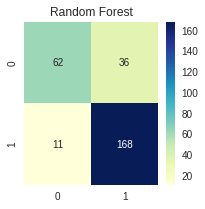

              precision    recall  f1-score   support

           0       0.85      0.63      0.73        98
           1       0.82      0.94      0.88       179

    accuracy                           0.83       277
   macro avg       0.84      0.79      0.80       277
weighted avg       0.83      0.83      0.82       277

------------------------------------------
ROC Curves              = 0.7856002736290046
Precision-Recall Curves = 0.9008940445669827


In [180]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('Random Forest')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

Training Accuracy : 0.8374613003095975
Testing Accuracy : 0.7653429602888087


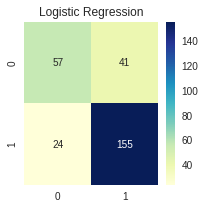

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        98
           1       0.79      0.87      0.83       179

    accuracy                           0.77       277
   macro avg       0.75      0.72      0.73       277
weighted avg       0.76      0.77      0.76       277

------------------------------------------
ROC Curves              = 0.7237772203853609
Precision-Recall Curves = 0.8716903567590439


In [181]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0).fit(X_train, y_train)

LR.score(X_train, y_train)

y_pred_LR = LR.predict(X_test)

print("Training Accuracy :", LR.score(X_train, y_train))
print("Testing Accuracy :", LR.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_LR)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('Logistic Regression')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_LR)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_LR)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)
Precision_Recall_LRS = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_LRS)

Training Accuracy : 0.8111455108359134
Testing Accuracy : 0.7689530685920578


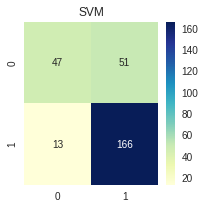

              precision    recall  f1-score   support

           0       0.78      0.48      0.59        98
           1       0.76      0.93      0.84       179

    accuracy                           0.77       277
   macro avg       0.77      0.70      0.72       277
weighted avg       0.77      0.77      0.75       277

roc_auc 0.7034830692053358
------------------------------------------
ROC Curves              = 0.7034830692053358
Precision-Recall Curves = 0.8696413340717808


In [182]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_predicted_svm = svm.predict(X_test)

print("Training Accuracy :", svm.score(X_train, y_train))
print("Testing Accuracy :", svm.score(X_test, y_test))


cm = confusion_matrix(y_test, y_predicted_svm)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('SVM')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_svm)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_svm)
f1 = f1_score(y_test, y_predicted_svm)
Precision_Recall_svm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_svm)

In [183]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
scores = {'LGBM':  { 
                             'precision_score': precision_score(y_test, y_pred_lgb),
                             'Recall_score': recall_score(y_test, y_pred_lgb)
                         },        
                 
                        
                 'Random Forest':  { 
                             'precision_score': precision_score(y_test, y_pred_rf),
                            'Recall_score': recall_score(y_test, y_pred_rf)
                         },
                'Logistic Regression':  { 
                             'precision_score': precision_score(y_test, y_pred_LR),
                            'Recall_score': recall_score(y_test, y_pred_LR)
                         },
               'Support Vector Machine':  { 
                             'precision_score': precision_score(y_test, y_predicted_svm),
                            'Recall_score': recall_score(y_test, y_predicted_svm)
                         }
          
          
            }

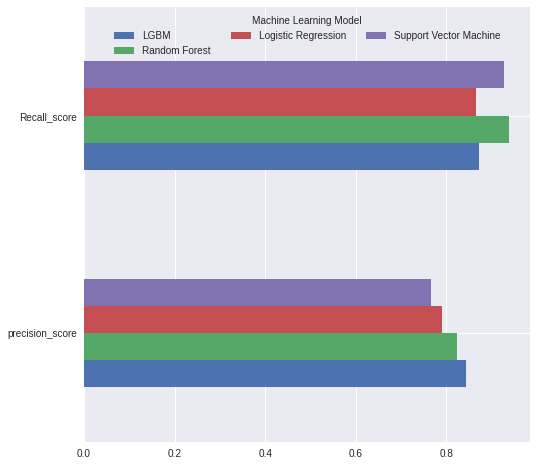

In [184]:
scores = pd.DataFrame(scores)


scores.plot(kind="barh",figsize=(8, 8)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

In [185]:
auc = {'LGBM':  { 
                            print( "LGBM Training Accuracy :", clf.score(X_train, y_train)),
                            print( "LGBM Testing Accuracy :", clf.score(X_test, y_test)),
                            print("\n")
                             
                         },        
                 
                        
                 'Random Forest':  { 
                            print("Random Forest Training Accuracy :",rf.score(X_train, y_train)),
                             print("Random Forest Testing Accuracy :", rf.score(X_test, y_test)),
                             print("\n")
                         },
                'Logistic Regression':  { 
                             print("Logistic Regression Training Accuracy :", LR.score(X_train, y_train)),
                             print("Logistic Regression Testing Accuracy :", LR.score(X_test, y_test)),
                             print("\n")
                         },
               'Support Vector Machine':  { 
                             print("Support Vector Machine Training Accuracy :", svm.score(X_train, y_train)),
                             print("Support Vector Machine Testing Accuracy :", svm.score(X_test, y_test))
                         }
          
          
            }

LGBM Training Accuracy : 1.0
LGBM Testing Accuracy : 0.8122743682310469


Random Forest Training Accuracy : 1.0
Random Forest Testing Accuracy : 0.8303249097472925


Logistic Regression Training Accuracy : 0.8374613003095975
Logistic Regression Testing Accuracy : 0.7653429602888087


Support Vector Machine Training Accuracy : 0.8111455108359134
Support Vector Machine Testing Accuracy : 0.7689530685920578
